# SMS Spam Collection: problemă de clasificare

Sîrbu Matei Dan, _grupa 10LF383_

_Sursă dataset:_ [https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) 

_Synopsis:_ Setul de date _SMS Spam Collection_ cuprinde un corpus de 5572 de mesaje de tip SMS, 747 dintre ele fiind _spam_, iar 4825, _ham_ (non-spam), colectate pentru studiului spamului telefonic. În cele ce urmează, datasetul va fi analizat pentru clasificarea mesajelor.

## 1. Importarea datelor

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [2]:
header = ['category', 'sms_content']
data_sms = pd.read_csv("./Datasets/SMS Spam Collection/SMSSpamCollection.txt", names=header, sep='\t')
data_sms['is_spam'] = (data_sms[['category']] == 'spam').astype(int)
display(HTML("<i>Dataset overview:</i>"))
display(data_sms)

,category,sms_content,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


## 2. Statistici dataset

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [4]:
vect = CountVectorizer()
vect_fit = vect.fit_transform(data_sms.iloc[:, 1])

In [5]:
print(f'Număr de cuvinte: {len(vect.vocabulary_)}')

Număr de cuvinte: 8713


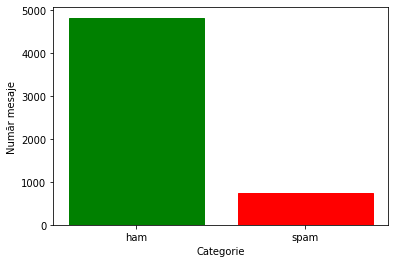

In [6]:
hist_x = ['ham', 'spam']; 
hist_y = [data_sms[data_sms.category == 'ham'].count()['category'], data_sms[data_sms.category == 'spam'].count()['category']]

barlist = plt.bar(hist_x, hist_y, align='center')
barlist[0].set_color('g')
barlist[1].set_color('r')
plt.xlabel('Categorie')
plt.ylabel('Număr mesaje')
plt.show()

In [7]:
k = 30
word_list, count_list = vect.get_feature_names(), vect_fit.toarray().sum(axis=0)
word_freq = pd.DataFrame(count_list, index=word_list)
word_freq.columns = ['Frecvență']
display(HTML(f'<i>Cele mai frecvente {k} {"de" if (k >= 20) else ""} cuvinte: </i>'))
word_freq_desc = word_freq.sort_values(by='Frecvență', ascending=False)[:k]
display(word_freq_desc)

,Frecvență
to,2253
you,2245
the,1339
and,980
in,903
is,897
me,807
my,766
it,752
for,711


Cel mai scurt cuvânt: go, 2 caractere
Cel mai lung cuvânt: hypotheticalhuagauahahuagahyuhagga (wait, what?), 34 caractere
Lungimea medie: 6.16 caractere


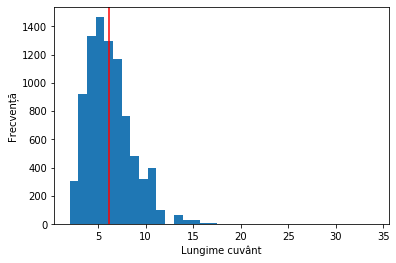

In [8]:
words_sorted_by_length = sorted(vect.vocabulary_.items(), key = lambda item: len(item[0]))
shortest_word = words_sorted_by_length[0]
longest_word = words_sorted_by_length[-1]
print(f'Cel mai scurt cuvânt: {shortest_word[0]}, {len(shortest_word[0])} caractere')
print(f'Cel mai lung cuvânt: {longest_word[0]} (wait, what?), {len(longest_word[0])} caractere')
word_lengths = [len(item) for item in vect.get_feature_names()]
print(f'Lungimea medie: {round(np.mean(word_lengths), 2)} caractere')
plt.hist(word_lengths, bins=35)
plt.xlabel('Lungime cuvânt'); plt.ylabel('Frecvență')
plt.axvline(np.mean(word_lengths), color='r')
plt.show()

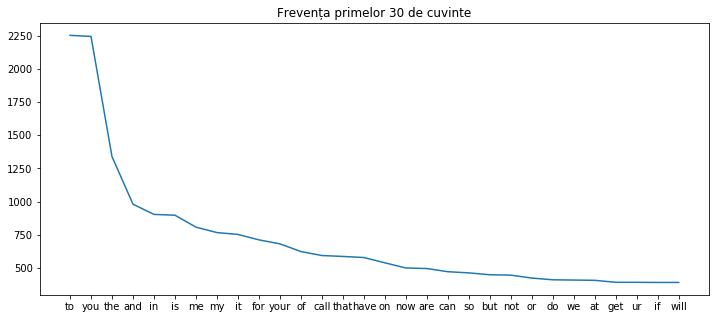

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.title(f'Frevența primelor {k} {"de" if (k >= 20) else ""} cuvinte')
ax.plot(word_freq_desc.index, word_freq_desc.values)
plt.show()

### Observație: [Legea lui Zipf](https://en.wikipedia.org/wiki/Zipf%27s_law)

Legea lui Zipf<sup>[[1]](https://en.wikipedia.org/wiki/Zipf%27s_law)[[2]](https://www.youtube.com/watch?v=fCn8zs912OE&t=41)</sup> este o lege empirică popularizată de George Zipf, un lingvist american. Legea afirmă că multe seturi de date din domenii variate (printre care și frecvența cuvintelor dintr-o limbă sau un corpus) urmează toate, în mod inexplicabil, o distribuție Zipfiană. O astfel de distribuție are PMF: $$\large f(k; S, N) = \frac{\frac{1}{k^s}}{\sum_{i=1}^N (\frac{1}{n^s})}$$

În figura de mai jos este ilustrat un plot pe scară logaritmică al frecvențelor primelor 10 milioane de cuvinte din 30 de versiuni Wikipedia: _[en,de,ro,it,...].wikipedia.org_. Observăm că toate cele 30 urmează o distribuție Zipfiană, o linie aproape dreaptă pe graficul de mai jos:

<img src="Images/zipf.png" style="width: 600px">

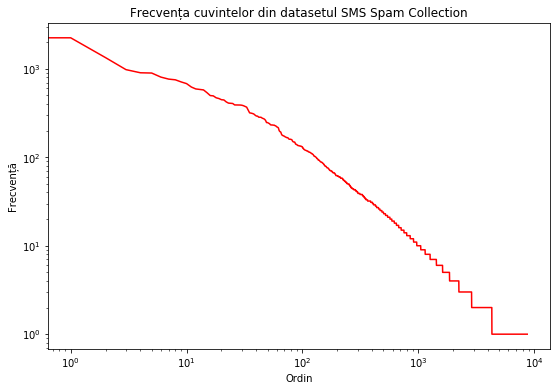

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
word_freq_desc_all = word_freq.sort_values(by='Frecvență', ascending=False)
x = np.arange(0, len(vect.vocabulary_))
plt.title(f'Frecvența cuvintelor din datasetul SMS Spam Collection')
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel('Ordin'); ax.set_ylabel('Frecvență')
ax.plot(x, word_freq_desc_all.values, color='r')
plt.show()

Observăm că, suprinzător, frecvența cuvintelor din datasetul _SMS spam collection_ are același pattern ca cel al frecvențelor cuvintelor din versiunile de Wikipedia.

## 3. Preprocesarea datelor

### `&lt;` și `&gt;`

Pentru început, setul de date conține în mod repetat stringurile `&lt;` și `&gt;`, rămășițe ale entităților HTML < și >. Ca prim pas al prepocesării datelor, întrucât aceste stringuri nu fac parte din textul SMS-urilor, se consideră noise și vor fi înlăturate.
![&lt;#&gt;](Images/lessthan.png)

In [11]:
# SMS-urile cu &lt; evidențiat în figura de mai sus
print(f'data_sms[44]: {data_sms.iloc[44].sms_content}');print(f'data_sms[51]: {data_sms.iloc[51].sms_content}');print(f'data_sms[55]: {data_sms.iloc[55].sms_content}')

data_sms[44]: Great! I hope you like your man well endowed. I am  &lt;#&gt;  inches...
data_sms[51]: A gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;
data_sms[55]: Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;


In [12]:
# Eliminarea stringurilor &lt; și &gt;
data_sms['sms_content'] = data_sms.sms_content.str.replace('&lt;' , '')
data_sms['sms_content'] = data_sms.sms_content.str.replace('&gt;' , '')

In [13]:
# SMS-urile sanitizate
print(f'data_sms[44]: {data_sms.iloc[44].sms_content}');print(f'data_sms[51]: {data_sms.iloc[51].sms_content}');print(f'data_sms[55]: {data_sms.iloc[55].sms_content}')

data_sms[44]: Great! I hope you like your man well endowed. I am  #  inches...
data_sms[51]: A gram usually runs like  # , a half eighth is smarter though and gets you almost a whole second gram for  #
data_sms[55]: Do you know what Mallika Sherawat did yesterday? Find out now @  URL


### Stopwords

Un alt pas în preprocesarea datelor este eliminarea cuvintelor neinformative, sau _stopwords_. Sunt cuvinte care se repetă foarte des și care nu transmit nicio informație, deci sunt deseori filtrate în NLP. Pentru comoditate, scikit-learn conține deja un set de stopwords în limba engleză, set pe care îl vom folosi în filtrarea SMS-urilor. 

In [14]:
text = data_sms[['sms_content']].to_numpy().ravel()
y = data_sms[['is_spam']].to_numpy().ravel()

vec = CountVectorizer(min_df=5, stop_words='english')
X = vec.fit_transform(text)

## 4. Despre modelele de clasificare

Pentru clasificarea datelor din dataset vom utiliza următoarele modele de clasificare: kNN, Decision Tree, MLP, Gaussian NB și Random Forest. În paragraful următor vă vom explica modul de funcționare al fiecărui algoritm și evidenția hiperparametrii și formulele care stau la baza acestora.
<div style="text-align:center"><img src="./Images/xkcd_machine_learning.png"><br>"hiperparametrii și formulele care stau la baza acestora"<br>sursă: <a href="https://xkcd.com/1838/">xkcd 1838: Machine Learning</a></div>

### [1. <i>k</i>-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

class `sklearn.neighbors.KNeighborsClassifier`<i>(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)</i>

Într-o problemă de clasificare, algoritmul kNN (_k_-nearest neighbors) identifică cei mai apropiați _k_ vecini ai fiecărui item neclasificat - indiferent de etichetele acestora - vecini localizați în setul de antrenare. Determinarea claselor din care fac parte itemii neclasificați se face prin votare: clasa în care aparțin majoritatea vecinilor se consideră clasa itemului.
<div style="text-align:center"><img style="width: 500px" src="./Images/knn_example.png"><br>Exemplu: clasificarea itemului c cu 3NN. În urma votării se determină clasa lui c: <b>o</b>.<br>sursă: <a href="http://youtu.be/UqYde-LULfs">YouTube (<i>How kNN algorithm works</i> de Thales Sehn Körting)</a></div><br>

Pentru determinarea distanței dintre itemi se pot utiliza mai multe metrici. Scikit-learn admite orice funcție Python ca și metrică, dar implicit folosește metrica _Minkowski_. Iată câteva exemple de metrici des utilizate în kNN:

- _distanța Minkowski_: $d_{st} = \sqrt[p]{\sum_{j=1}^n |x_{sj} - y_{tj}|^p}$  (_Obs._: p este un hiperparametru utilizat de Scikit-learn)
- _distanța Euclideană_: $d(\textbf{x},\textbf{y}) = \sqrt{\sum_{i=1}^n (y_i - x_i)^2}$
- _distanța Manhattan (City block)_: $d_{st} = \sum_{j=1}^n |x_{sj} - y_{tj}|$
- _distanța Mahalanobis_: $d(\textbf{x},\textbf{y}) = \sqrt{\sum_{i=1}^n \frac{(x_i - y_i)^2}{s_i^2}}$, unde $s_i$ este deviația standard a lui $x_i$ și $y_i$ în sample

### [2. Decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

class `sklearn.tree.DecisionTreeClassifier`<i>(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)</i>

Un arbore de decizie (_decision tree_) este o structură arborescentă tip flowchart unde un nod intern reprezintă un feature, ramura este un criteriu de decizie, iar fiecare frunză este un rezultat, o clasificare. Algoritmul Decision tree selectează cel mai bun feature folosind o metrică ASM (_Attribute Selection Measure_), convertÂește un nod feature la un nod tip criteriu de decizie, și partiționează (splits) datasetul în subseturi. Procesul se execută recursiv până arborele conține numai noduri criterii de decizie și noduri frunză rezultat. Cu cât arborele este mai adânc, cu atât sunt mai complexe criteriile de decizie și modelul are o acuratețe mai mare. 

<div style="text-align:center"><img style="width: 600px" src="./Images/dt_diagram.png"><br>Structura unui arbore de decizie.<br>sursă: <a href="https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html">KDnuggets (Decision Tree Algorithm, Explained)</a></div>

<br>Pentru măsurarea calității unui split, Scikit-learn utilizează două metrici ASM:

- _impuritatea Gini_ (cât de des este etichetat greșit un element ales aleator dacă a fost etichetat folosind distribuția etichetelor dintr-un subset; poate determina overfitting-ul modelului): <br>$Gini(p) = 1 - \sum_{j=1}^c p_j^2$ <br>
- _entropia_ (similar cu Gini impurity, mai intensă d.p.d.v. computațional din cauza funcției logaritmice): <br>$H(p) = - \sum_{j=1}^c p_j \log p_j$

(unde c este numărul de clase (etichete), iar $p_j$ este subsetul etichetat cu clasă i, unde $j \in \{1, 2, ..., c\}$).

### [3. Multilayer perceptron (MLP) classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

class `sklearn.neural_network.MLPClassifier`<i>(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)</i>

_Perceptronii_ sunt o clasă de clasificatori utilizați în învățarea supervizată, fiind un model matematic al unui neuron biologic. În particular, _perceptronii multistrat (MLP)_ formează rețele neuronale cu mai multe straturi de perceptroni: un strat de intrare, unul sau mai multe straturi intermediare (ascunse), și un strat de ieșire.

<div style="text-align:center"><img style="width: 500px" src="./Images/mlp_diagram.png"><br>Un perceptron multistrat ilustrat.<br>sursă: <a href="https://github.com/ledell/sldm4-h2o/blob/master/sldm4_h2o_oct2016.pdf">GitHub (ledell/sldm4-h2o)</a></div>

<br>Într-o rețea neuronală, o _funcție de activare_ definește ieșirea unui perceptron după ce este supus unui set de intrare. În forma lui cea mai simplă, funcția poate returna un rezultat binar (funcție liniară, output 0 sau 1): făcând analogie cu neuronul biologic, dacă trece un impuls electric prin axonul acestuia sau nu. În cazul rețelelor neuronale moderne care utilizează mai multe straturi de perceptroni, funcțiile de activare pot fi și non-binare (non-liniare). Scikit-learn admite funcții de activare de ambele tipuri în implementarea MLP classifier:
- _funcția identitate_: $f(x) = x$
- _sigmoida logistică_: $f(x) = \frac{1}{1 + \exp(-x)}$
- _tangenta hiperbolică_: $f(x) = \tanh(x) = \frac{\sinh(x)}{\cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- _Rectified Linear Unit (ReLU)_: $f(x) = \max(0, x) = \begin{cases} 0 & \text{dacă } x \leq 0 \\ x & \text{dacă } x > 0 \end{cases}$

De asemenea, clasificatorul MLP din Scikit-learn utilizează și algoritmi de optimizare a ponderilor (solvers): _LBFGS_ (algoritm Quasi-Newton), _SGD_ (stochastic gradient descent) și _Adam_ (algoritm derivat din SGD, creat de Diederik P. Kingma și Jimmy Lei Ba).

### [4. Gaussian Naïve Bayes classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

class `sklearn.naive_bayes.GaussianNB`<i>(priors=None, var_smoothing=1e-09)<i>

Algoritmul de clasificare _Gaussian Naïve Bayes_ aparține familiei de clasificatori _Naïve Bayes_, care presupun că prezența unui feature într-o clasă nu este afectată de prezența altor features; pe scurt, proprietățile contribuie independent la probabilitatea apartenenței la o clasă. În particular, algoritmul _Gaussian Naïve Bayes_ urmează funcția de probabilitate (PDF) a unei distribuții normale (Gaussiene):
$$\large P(x_i | y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}}\exp\bigg(-\frac{(x_i - \mu_y)^2}{2 \sigma_y^2}\bigg),$$
unde parametrii $\sigma_y$ și $\mu_y$, deviația standard și media, sunt determinați folosind maximum likelihood estimation (MLE), o metodă de estimare a parametrilor unei PDF prin maximizarea unei funcții de likelihood (cât de bine se potrivește un sample cu un model statistic).

### [5. Random Forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

class `sklearn.ensemble.RandomForestClassifier`<i>(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)<i>

Un clasificator _Random forest_ se folosește de ipotezele emise de mai mulți arbori de decizie aleatori (_random trees_), obținuți în urma unui _random split_. Un random forest se obține prin construirea unui random tree pentru fiecare set de antrenare. Acești arbori funcționează ca un ansamblu; pentru fiecare dată de intrare se aplică modelele din ansamblu, și rezultatul final se obține agregând rezultatele prin votare. Astfel, un random forest este un _meta-estimator_: se obține o predicție în urma mai multor predicții.
<div style="text-align:center"><img style="width: 400px" src="./Images/rf_diagram.png"><br>Un model random forest făcând o predicție; în urma votării se obține rezultatul 1.<br>sursă: <a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Medium (Towards Data Science: Understanding Random Forest)</a></div>

<br>La fel ca la _Decision Tree classifier_, pentru măsurarea calității unui split, Scikit-learn utilizează două metrici:

- _impuritatea Gini_: $Gini(p) = 1 - \sum_{j=1}^c p_j^2$ <br>
- _entropia_: $H(p) = - \sum_{j=1}^c p_j \log p_j$

(unde c este numărul de clase (etichete), iar $p_j$ este subsetul etichetat cu clasă i, unde $j \in \{1, 2, ..., c\}$).

## 5. Clasificarea datelor

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler

In [16]:
# scalare pentru k-nearest neighbors classifier
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)
score_tables = []

In [17]:
param_candidates = {'n_neighbors': np.linspace(start=1, stop=30, num=30, dtype=int), 'p': np.linspace(start=1, stop=5, num=4, dtype=int)} 
param_search = RandomizedSearchCV(estimator=KNeighborsClassifier(metric='euclidean'), param_distributions=param_candidates, scoring='f1', random_state=42)
scores = cross_validate(param_search, X, y, cv=KFold(5), scoring=['f1', 'accuracy'], return_train_score=True)

score_table_1 = pd.DataFrame({'Model_name': 'KNeighborsClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'RandomizedSearchCV'})
score_table_1 = pd.concat([score_table_1,pd.DataFrame(scores)], axis=1)
display(score_table_1)
score_tables.append(score_table_1)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,KNeighborsClassifier,1,RandomizedSearchCV,3.541629,0.105063,0.715328,0.832517,0.930045,0.961633
1,KNeighborsClassifier,2,RandomizedSearchCV,3.462913,0.101839,0.682243,0.850095,0.939013,0.964550
2,KNeighborsClassifier,3,RandomizedSearchCV,3.084988,0.103571,0.688372,0.831144,0.939856,0.959623
3,KNeighborsClassifier,4,RandomizedSearchCV,3.444296,0.103721,0.669492,0.829315,0.929982,0.960296
4,KNeighborsClassifier,5,RandomizedSearchCV,3.509018,0.104265,0.678261,0.842006,0.933573,0.962539


In [18]:
param_candidates = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']} 
param_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_candidates, scoring='f1')
scores = cross_validate(param_search, X, y, cv=KFold(5), scoring=['f1', 'accuracy'], return_train_score=True)

score_table_2 = pd.DataFrame({'Model_name': 'DecisionTreeClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_table_2 = pd.concat([score_table_2,pd.DataFrame(scores)], axis=1)
display(score_table_2)
score_tables.append(score_table_2)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,DecisionTreeClassifier,1,GridSearchCV,1.256648,0.002722,0.906977,0.996534,0.971300,0.999103
1,DecisionTreeClassifier,2,GridSearchCV,1.323254,0.001866,0.869258,0.996689,0.966816,0.999103
2,DecisionTreeClassifier,3,GridSearchCV,1.235438,0.001830,0.880309,0.998358,0.972172,0.999551
3,DecisionTreeClassifier,4,GridSearchCV,0.589811,0.001503,0.870130,0.999153,0.964093,0.999776
4,DecisionTreeClassifier,5,GridSearchCV,1.109306,0.001887,0.842466,0.996667,0.958707,0.999103


In [20]:
param_candidates = {'alpha': [0.1, 0.2, 0.3]}
param_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid=param_candidates, scoring='f1')
scores = cross_validate(param_search, X, y, cv=KFold(5), scoring=['f1', 'accuracy'], return_train_score=True)

score_table_3 = pd.DataFrame({'Model_name': 'MLPClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_table_3 = pd.concat([score_table_3,pd.DataFrame(scores)], axis=1)
display(score_table_3)
score_tables.append(score_table_3)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,MLPClassifier,1,GridSearchCV,62.501931,0.002031,0.944444,0.989529,0.983857,0.997308
1,MLPClassifier,2,GridSearchCV,60.519310,0.002252,0.940299,0.990841,0.985650,0.997532
2,MLPClassifier,3,GridSearchCV,62.629544,0.002166,0.909804,0.995885,0.979354,0.998878
3,MLPClassifier,4,GridSearchCV,62.504872,0.002438,0.924658,0.988879,0.980251,0.997084
4,MLPClassifier,5,GridSearchCV,64.010709,0.002124,0.929577,0.991625,0.982047,0.997757


In [22]:
param_candidates = {'var_smoothing': np.linspace(start=1e-9, stop=1e-2, num=500)} 
param_search = RandomizedSearchCV(estimator=GaussianNB(), param_distributions=param_candidates, scoring='f1')
scores = cross_validate(param_search, X.toarray(), y, cv=KFold(5), scoring=['f1', 'accuracy'], return_train_score=True)

score_table_4 = pd.DataFrame({'Model_name': 'GaussianNB', 'Fold': np.arange(1, 6), 'Search_strategy': 'RandomizedSearchCV'})
score_table_4 = pd.concat([score_table_4,pd.DataFrame(scores)], axis=1)
display(score_table_4)
score_tables.append(score_table_4)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,GaussianNB,1,RandomizedSearchCV,5.343616,0.036761,0.883469,0.890995,0.961435,0.969037
1,GaussianNB,2,RandomizedSearchCV,5.041610,0.021501,0.822086,0.871533,0.947982,0.960512
2,GaussianNB,3,RandomizedSearchCV,5.136401,0.025335,0.814103,0.890370,0.947935,0.966801
3,GaussianNB,4,RandomizedSearchCV,5.088739,0.024833,0.832370,0.876033,0.947935,0.962988
4,GaussianNB,5,RandomizedSearchCV,5.068769,0.020564,0.865031,0.890401,0.960503,0.967474


In [23]:
param_candidates = {'criterion': ['gini', 'entropy']} 
param_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_candidates, scoring='f1')
scores = cross_validate(param_search, X, y, cv=KFold(5), scoring=['f1', 'accuracy'], return_train_score=True)

score_table_5 = pd.DataFrame({'Model_name': 'RandomForestClassifier', 'Fold': np.arange(1, 6), 'Search_strategy': 'GridSearchCV'})
score_table_5 = pd.concat([score_table_5,pd.DataFrame(scores)], axis=1)
display(score_table_5)
score_tables.append(score_table_5)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,RandomForestClassifier,1,GridSearchCV,6.067940,0.079629,0.947692,0.996534,0.984753,0.999103
1,RandomForestClassifier,2,GridSearchCV,6.012591,0.082779,0.916968,0.996689,0.979372,0.999103
2,RandomForestClassifier,3,GridSearchCV,6.024150,0.085765,0.897638,0.998358,0.976661,0.999551
3,RandomForestClassifier,4,GridSearchCV,5.020585,0.061661,0.896552,0.999153,0.973070,0.999776
4,RandomForestClassifier,5,GridSearchCV,5.874188,0.083975,0.899281,0.996667,0.974865,0.999103


## 6. Generarea și exportarea raportului

In [24]:
def highlight(s):
    is_max = s == s.max()
    is_min = s == s.min()
    styles = []
    for i in range(0, len(is_max)):
        if is_max[i]:
            styles.append('background-color: green')
        elif is_min[i]:
            styles.append('background-color: red')
        else:
            styles.append('')
    return styles

all_scores = pd.concat(score_tables, ignore_index=True)
all_scores_styled = all_scores.style.apply(highlight, subset=['test_f1','train_f1','test_accuracy','train_accuracy'])
display(all_scores_styled)

,Model_name,Fold,Search_strategy,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy
0,KNeighborsClassifier,1,RandomizedSearchCV,3.541629,0.105063,0.715328,0.832517,0.930045,0.961633
1,KNeighborsClassifier,2,RandomizedSearchCV,3.462913,0.101839,0.682243,0.850095,0.939013,0.964550
2,KNeighborsClassifier,3,RandomizedSearchCV,3.084988,0.103571,0.688372,0.831144,0.939856,0.959623
3,KNeighborsClassifier,4,RandomizedSearchCV,3.444296,0.103721,0.669492,0.829315,0.929982,0.960296
4,KNeighborsClassifier,5,RandomizedSearchCV,3.509018,0.104265,0.678261,0.842006,0.933573,0.962539
5,DecisionTreeClassifier,1,GridSearchCV,1.256648,0.002722,0.906977,0.996534,0.971300,0.999103
6,DecisionTreeClassifier,2,GridSearchCV,1.323254,0.001866,0.869258,0.996689,0.966816,0.999103
7,DecisionTreeClassifier,3,GridSearchCV,1.235438,0.001830,0.880309,0.998358,0.972172,0.999551
8,DecisionTreeClassifier,4,GridSearchCV,0.589811,0.001503,0.870130,0.999153,0.964093,0.999776
9,DecisionTreeClassifier,5,GridSearchCV,1.109306,0.001887,0.842466,0.996667,0.958707,0.999103


In [25]:
html_str = """
<h1><u>SMS Spam Collection</u></h1>
"""
html_str = html_str + (all_scores_styled.render())
html_file = open("./Reports/sms_spam.html", "w")
html_file.write(html_str)
html_file.close()